<a href="https://colab.research.google.com/github/KinzaAslam/DSA_20SW071/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
df = pd.read_csv('dataset.csv')

df = df.dropna()

# Create a list of symptom columns
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9','Symptom_10', 'Symptom_11', 'Symptom_12','Symptom_13', 'Symptom_14', 'Symptom_15','Symptom_16', 'Symptom_17']

# Create an empty dictionary to store symptom counts
symptom_counts = {}

# Iterate through each row and count the occurrences of symptoms
for _, row in df.iterrows():
    for column in symptom_columns:
        symptom = row[column]
        if pd.notna(symptom):  # Check if the cell is not empty
            if symptom in symptom_counts:
                symptom_counts[symptom] += 1
            else:
                symptom_counts[symptom] = 1

# Convert the dictionary to a DataFrame
symptom_counts_df = pd.DataFrame(symptom_counts.items(), columns=['Symptom', 'Count'])

# Sort the DataFrame by the 'Count' column in descending order
symptom_counts_df = symptom_counts_df.sort_values(by='Count', ascending=False)

# Display the most common symptoms
print(symptom_counts_df.head())


                 Symptom  Count
0    continuous_sneezing     72
9      throat_irritation     72
15         loss_of_smell     72
14            chest_pain     72
13            congestion     72


In [54]:


# Create a list of symptom columns
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9','Symptom_10', 'Symptom_11', 'Symptom_12','Symptom_13', 'Symptom_14', 'Symptom_15','Symptom_16', 'Symptom_17']

# Create an empty dictionary to store the diseases associated with each symptom
symptom_disease_dict = {}

# Iterate through each row and create a mapping of symptoms to diseases
for _, row in df.iterrows():
    disease = row['Disease']
    for column in symptom_columns:
        symptom = row[column]
        if pd.notna(symptom):  # Check if the cell is not empty
            if symptom in symptom_disease_dict:
                symptom_disease_dict[symptom].append(disease)
            else:
                symptom_disease_dict[symptom] = [disease]

# Create a dictionary to store the count of diseases per symptom
diseases_per_symptom_count = {symptom: len(diseases) for symptom, diseases in symptom_disease_dict.items()}

# Find how many diseases share a common symptom
common_symptom_count = sum(1 for count in diseases_per_symptom_count.values() if count > 1)

# Print the result
print(f"Number of diseases that share a common symptom: {common_symptom_count}")


Number of diseases that share a common symptom: 17


In [56]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Group the data by the 'Disease' column and count the occurrences
disease_counts = df['Disease'].value_counts()

# Convert the result to a DataFrame for better readability
common_diseases_df = pd.DataFrame({'Disease': disease_counts.index, 'Frequency': disease_counts.values})

# Sort the DataFrame by frequency in descending order
common_diseases_df = common_diseases_df.sort_values(by='Frequency', ascending=False)

# Display the most common diseases
print(common_diseases_df.head())


                Disease  Frequency
0      Fungal infection        120
21              Allergy        120
23                 GERD        120
24  Chronic cholestasis        120
25        Drug Reaction        120


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with your actual dataset file path

# Select features (symptoms) and target variable (disease)
X = data[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']]
y = data['Disease']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier (you can choose a different model)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')



Model Accuracy: 100.00%


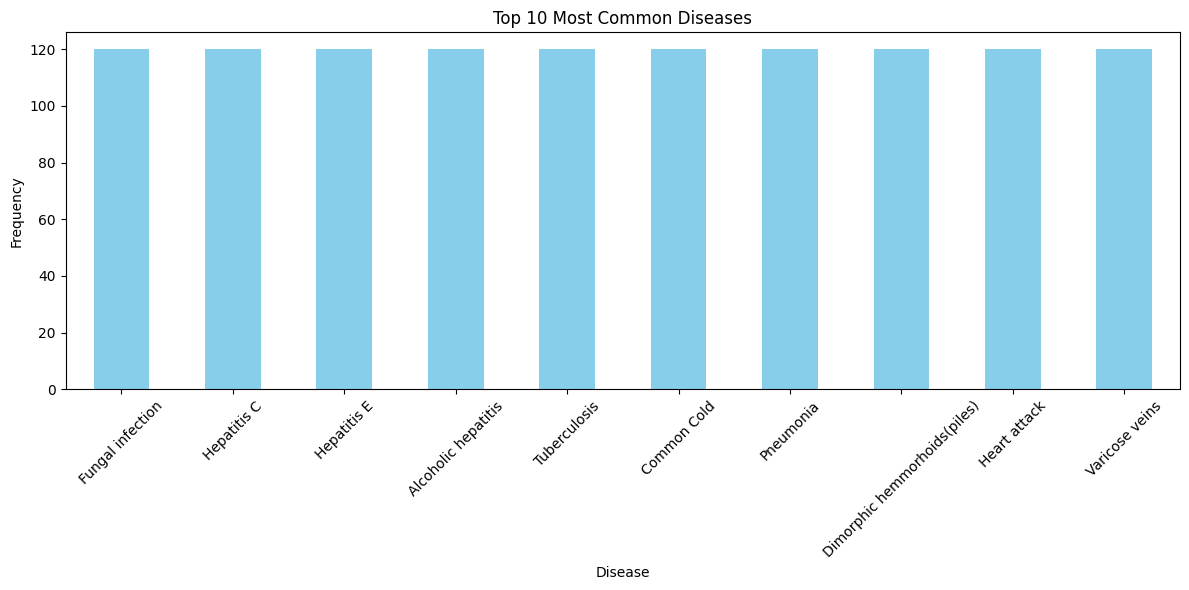

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Group the data by 'Disease' and count the occurrences
disease_counts = data['Disease'].value_counts()

# Define the number of top diseases to display (change as needed)
top_N = 10

# Select the top N most common diseases
top_diseases = disease_counts.head(top_N)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_diseases.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_N} Most Common Diseases')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()
